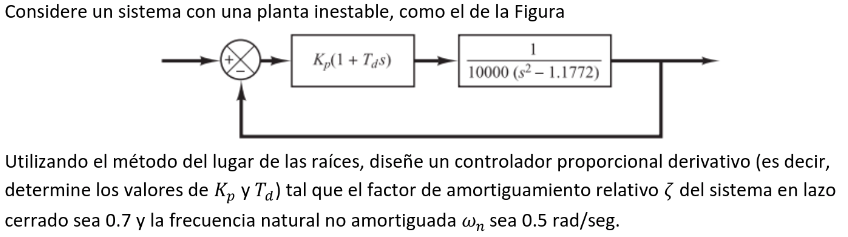

Por definición, para sistemas de segundo orden:
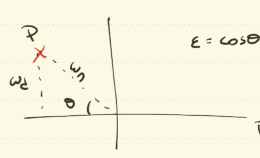

$P_{deseado}  = -w_n\times cos(\theta) + jw_n\times sin(\theta)$

$P_{deseado}  = -w_n\times cos(\theta) + jw_n\times \sqrt{1-cos^2(\theta)}$



$\boxed{P_{deseado} = -w_n\times \zeta + jw_n\times \sqrt{1-\zeta^2}}$

Primero que nada, importamos los paquetes necesarios

In [23]:
from control.matlab import *
from cmath import sqrt
import matplotlib.pyplot as plt

In [52]:
wn = 0.5 # frecuencia natural no amortiguada [rad/s]
zeta = 0.7 # factor de amortiguamiento relativo

Pdeseado = -wn*zeta + 1j*wn*sqrt(1-zeta**2)
Pdeseado

(-0.35+0.3570714214271425j)

Verificando si con un ajuste de ganancia ya se puede alcanzar el polo deseado

In [19]:
s = tf('s')
G = 1/(10000*(s**2 - 1.1772))
print('G(s) = ')
G

G(s) = 



          1
---------------------
1e+04 s^2 - 1.177e+04

Consultando documentación para rlocus

In [22]:
help(rlocus)

Help on function root_locus in module control.rlocus:

root_locus(sys, kvect=None, xlim=None, ylim=None, plotstr=None, Plot=True, PrintGain=None, grid=None, **kwargs)
    Root locus plot
    
    Calculate the root locus by finding the roots of 1+k*TF(s)
    where TF is self.num(s)/self.den(s) and each k is an element
    of kvect.
    
    Parameters
    ----------
    sys : LTI object
        Linear input/output systems (SISO only, for now).
    kvect : list or ndarray, optional
        List of gains to use in computing diagram.
    xlim : tuple or list, optional
        Set limits of x axis, normally with tuple (see matplotlib.axes).
    ylim : tuple or list, optional
        Set limits of y axis, normally with tuple (see matplotlib.axes).
    Plot : boolean, optional
        If True (default), plot root locus diagram.
    PrintGain : bool
        If True (default), report mouse clicks when close to the root locus
        branches, calculate gain, damping and print.
    grid : bool


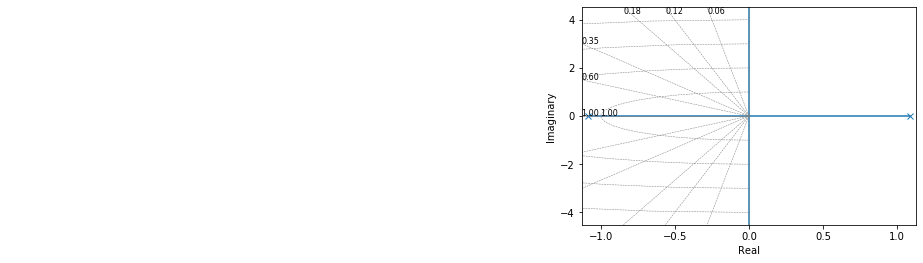

In [73]:
rlist, klist = rlocus(G, grid = True)